In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np


from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


!pip install pandas

In [3]:
from zipfile import ZipFile

data_path = 'dogs-vs-cats.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [41]:

path = 'dogs-vs-cats-data'
classes = os.listdir(path)
classes

['train', 'validation']

In [42]:
base_dir = 'dogs-vs-cats-data'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [28]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [29]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [31]:
# print(train_datagen)
history = model.fit(train_datagen,
		epochs=2,
		validation_data=test_datagen)


Epoch 1/2
704/704 [==============================] - 1546s 2s/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 7.8328e-04 - val_accuracy: 1.0000
Epoch 2/2
331/704 [=============>................] - ETA: 12:34 - loss: 9.7915e-04 - accuracy: 1.0000

NotFoundError: Graph execution error:

NewRandomAccessFile failed to Create/Open: dogs-vs-cats-data\train\cat.11295.jpg : The system cannot find the file specified.
; No such file or directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_22322]

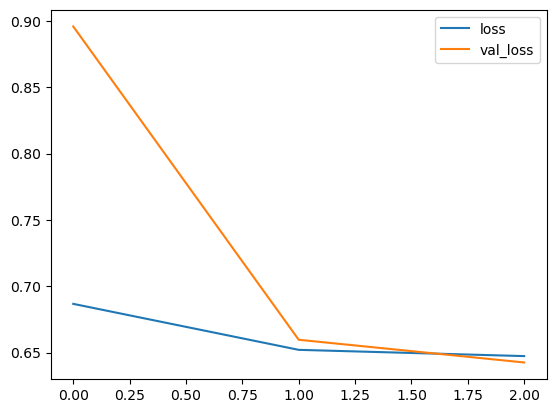

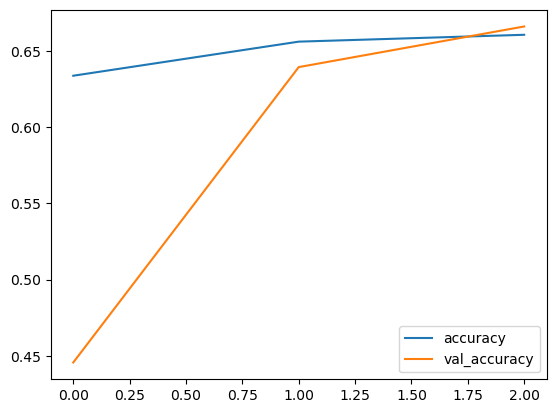

In [32]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


# Predictions

1/1 [==============================] - 0s 73ms/step
Cat


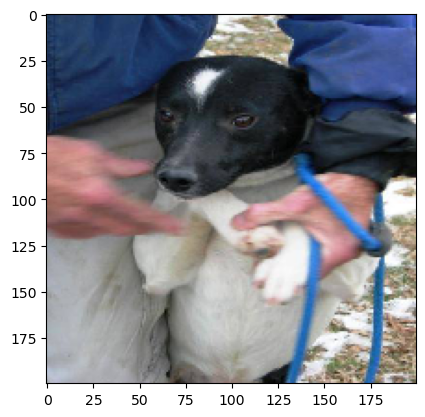

In [39]:

from keras.preprocessing import image

#Input image
test_image = keras.utils.load_img('1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image =  keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")


1/1 [==============================] - 0s 67ms/step
Cat


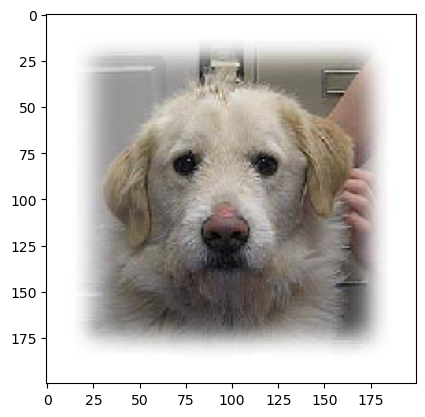

In [40]:

from keras.preprocessing import image

#Input image
test_image = keras.utils.load_img('3.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image =  keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")


1/1 [==============================] - 0s 71ms/step
Cat


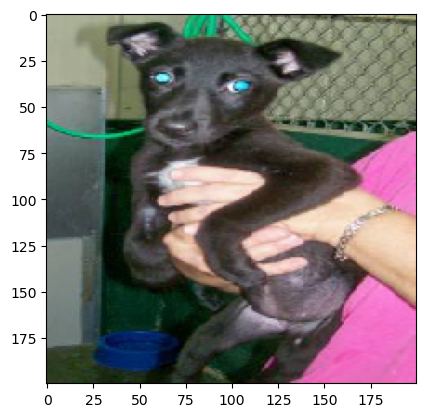

In [38]:

from keras.preprocessing import image

#Input image
test_image = keras.utils.load_img('17.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image =  keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")


1/1 [==============================] - 0s 68ms/step
Cat


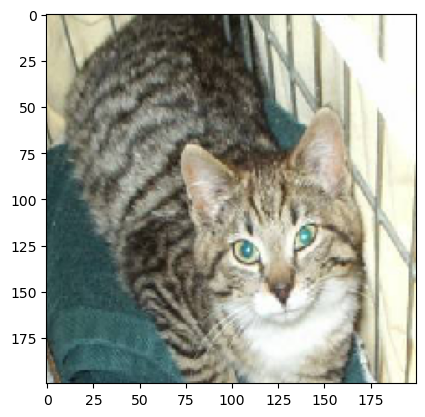

In [34]:

from keras.preprocessing import image

#Input image
test_image = keras.utils.load_img('19.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image =  keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")


1/1 [==============================] - 0s 62ms/step
[[0.6311215]]
Dog


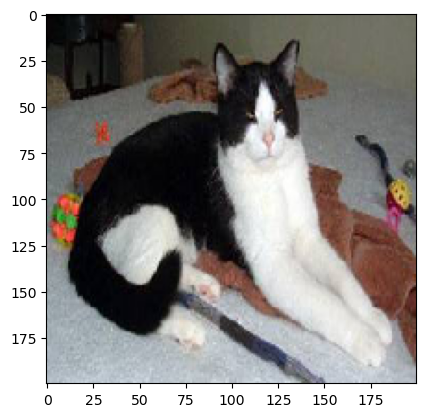

In [24]:

from keras.preprocessing import image

#Input image
test_image = keras.utils.load_img('20.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image =  keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)
print(result)
#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")


1/1 [==============================] - 0s 64ms/step
[[0.00015183]]
Cat


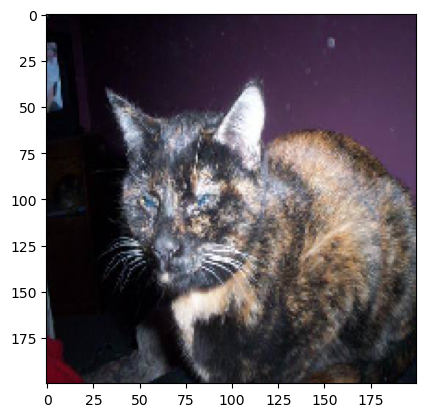

In [36]:

from keras.preprocessing import image

#Input image
test_image = keras.utils.load_img('13.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image =  keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)
print(result)
#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")
